In [1]:
from datetime import datetime, timedelta
from time import time

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.options.display.min_rows = 25

## Counting Credit Seeking times per student Up to END --> "Clustered_Users.csv"

In [32]:
clusters_df_22 = pd.read_csv("Clustered_Sessions_FCM.csv")
clusters_df_22.columns

Index(['cluster', 'user_id', 'session_number', 'curr_frameset_name',
       'Percentage_incorrects', 'Percentage_corrects',
       'percent_consecutive_incorrect_interactions',
       'percent_consecutive_correct_interactions', 'n_backs',
       'nth_trial_of_frame', 'time_between_median'],
      dtype='object')

In [45]:
framesets_credit_seek = clusters_df_22[clusters_df_22['cluster']=='Credit Seeking']['curr_frameset_name'].unique()

framesets_normal = clusters_df_22[clusters_df_22['cluster']=='Normal'] ['curr_frameset_name'].unique()
for framename in framesets_credit_seek:
    if (framename not in framesets_normal):
        print(framename)

RemoveLambdaFS
RemoveUnitFS
GreibachNormalFormFS


In [ ]:
clusteres_df_all = pd.concat([clusters_df_20_21, clusters_df_22])

In [ ]:
clusteres_df_all_credit_seeking  = clusteres_df_all[clusteres_df_all['cluster']=='Credit Seeking']
clusteres_df_all_normal  = clusteres_df_all[clusteres_df_all['cluster']=='Normal']


In [23]:
clusteres_df_all_credit_seeking.mean()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_15676\4240617402.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clusteres_df_all_credit_seeking.median()


user_id                                       7537.000000
Percentage_incorrects                            0.575758
Percentage_corrects                              0.414634
percent_consecutive_incorrect_interactions       0.366000
percent_consecutive_correct_interactions         0.160000
n_backs                                          0.000000
nth_trial_of_frame                               1.000000
time_between_median                              3.000000
dtype: float64

In [ ]:
clusteres_df_all_credit_seeking['n_backs'].describe()

count    4456.000000
mean        0.135996
std         0.483994
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: n_backs, dtype: float64

In [24]:
clusteres_df_all_normal.mean()

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_15676\159098035.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  clusteres_df_all_normal.median()


user_id                                       7537.000
Percentage_incorrects                            0.200
Percentage_corrects                              0.800
percent_consecutive_incorrect_interactions       0.000
percent_consecutive_correct_interactions         0.571
n_backs                                          0.000
nth_trial_of_frame                               1.000
time_between_median                              8.000
dtype: float64

In [ ]:
clusteres_df_all_normal['n_backs'].describe()

count    8233.000000
mean        0.064739
std         0.291709
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.000000
Name: n_backs, dtype: float64

In [6]:
# Adding time to the sessions clustered
time = pd.read_excel("Sessions_1D_22.xlsx")
time.columns

Index(['Unnamed: 0', 'user_id', 'session_number', 'curr_frameset_name',
       'activity_name', 'question_id', 'timestamp'],
      dtype='object')

In [7]:
frames_we_want = clusters_df.session_number.unique()
time = time[time['session_number'].isin(frames_we_want)]
time = time.groupby(["session_number"], as_index=False).agg(
    timestamp=("timestamp", "min"),
)
clustered_df_with_time = (
    pd.merge(
        clusters_df, time, left_on="session_number", right_on="session_number", how="inner"
    )
)

# Importing Grades --> "all_scores.csv"

In [184]:
all_scores = pd.read_excel("Grades_Users_22.xlsx")
all_scores.columns

Index(['Student', 'odsa_ID', 'Total Homeworks', 'Final Score',
       'Midterm 1 (1447029)', 'Homework 1', 'Homework 2', 'Homework 3',
       'Homework4', 'Homework 5'],
      dtype='object')

In [177]:
all_scores['Total Homeworks'] = all_scores[['Homework 1', 'Homework 2', 'Homework 3', 'Homework 4',]].sum(1)

In [178]:
all_scores['email'] = all_scores['SIS Login ID'].astype(str) + '@vt.edu'

In [179]:
email_opendsa_ID = pd.read_csv("email_opendsa_ID.csv")
idd = email_opendsa_ID['id'].tolist()
email = email_opendsa_ID["email"].tolist()
email_mapper = dict(zip(email, idd))
all_scores['odsa_ID'] = all_scores['email'].map(email_mapper)

In [180]:
all_scores['odsa_ID'].dropna(inplace=True)
all_scores = all_scores[['Student','odsa_ID', 'Total Homeworks','Final Score','Midterm 1', 'Homework 1', 'Homework 2',
       'Homework 3', 'Homework4',]]

In [130]:
all_scores["Is A"] = all_scores["Final Score"] >= 90

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_15676\1752933960.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_scores["Is A"] = all_scores["Final Score"] >= 90


In [131]:
# https://courses.cs.vt.edu/~cs1604/grading.html

letter_grade = []
for grade in all_scores["Final Score"]:
    if grade >= 90:
        letter_grade.append("A")
    elif grade >= 80:
        letter_grade.append("B")
    elif grade >= 70:
        letter_grade.append("C")
    elif grade >= 60:
        letter_grade.append("D")
    else:
        letter_grade.append("F")

all_scores["Letter Grade"] = letter_grade

C:\Users\Yusuf\AppData\Local\Temp\ipykernel_15676\255101209.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_scores["Letter Grade"] = letter_grade


In [218]:
all_scores = pd.read_csv("all_scores.csv")
all_scores = all_scores.drop('Student',axis=1)
all_scores = all_scores.fillna(0)


<AxesSubplot:xlabel='Final Score', ylabel='Proportion'>

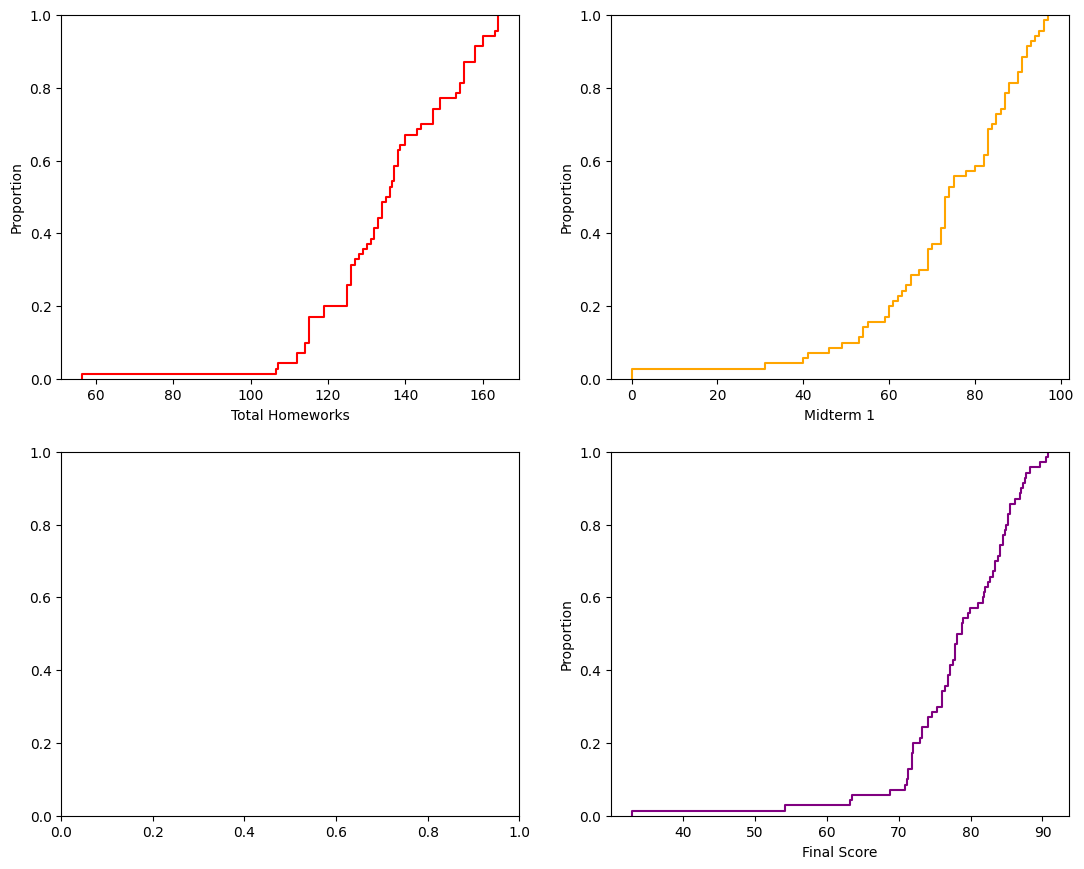

In [219]:
fig, axs = plt.subplots(2, 2, figsize=(13, 10.4))
plt.style.use("default")

sns.ecdfplot(data=all_scores["Total Homeworks"], legend=True, color="red", ax=axs[0, 0])
sns.ecdfplot(data=all_scores["Midterm 1"], legend=True, color="orange", ax=axs[0, 1])
sns.ecdfplot(data=all_scores["Final Score"], legend=True, color="purple", ax=axs[1, 1])
 

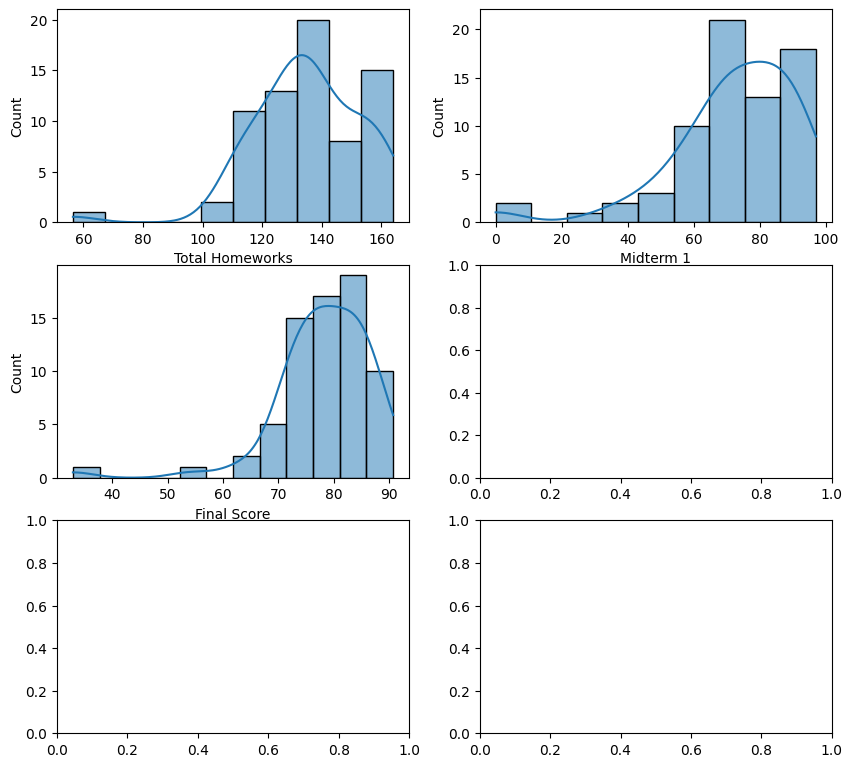

In [220]:
fig, axs = plt.subplots(3, 2, figsize=(10, 9.4))
plt.style.use("default")

sns.histplot(x=all_scores["Total Homeworks"], kde=True, ax=axs[0, 0])
sns.histplot(x=all_scores["Midterm 1"], kde=True, ax=axs[0, 1])
sns.histplot(x=all_scores["Final Score"], kde=True, ax=axs[1, 0])

fig.savefig("HistPlot Grades", dpi=500, facecolor="white")

## Clustered_Users

In [330]:
clusters_df = pd.read_csv("Clustered_Sessions_FCM.csv")
clusters_df.columns

Index(['cluster', 'user_id', 'session_number', 'curr_frameset_name',
       'Percentage_incorrects', 'Percentage_corrects',
       'percent_consecutive_incorrect_interactions',
       'percent_consecutive_correct_interactions', 'n_backs',
       'nth_trial_of_frame', 'time_between_median'],
      dtype='object')

In [331]:
all_scores = pd.read_csv("all_scores.csv")
all_scores.columns

Index(['Student', 'odsa_ID', 'Final Score', 'Midterm 1', 'Homework 1',
       'Homework 2', 'Homework 3', 'Homework 4', 'Homework 5',
       'Total Homeworks'],
      dtype='object')

In [332]:
Clustered_Users = clusters_df.groupby(["user_id", "cluster"], as_index=False).agg(
    Cluster_Count=("cluster", "count"),
    FramesetName_nunique=("curr_frameset_name", "nunique"),
)

In [333]:

# Cond on Cluster Type --> Drop Cluster Type --> Rename Count to new Name to be able to merge

credit_seeking_student_count = (
    Clustered_Users[Clustered_Users["cluster"] == "Credit Seeking"]
    .drop(labels=["cluster"], axis=1)
    .rename(
        columns={
            "Cluster_Count": "# CrSk Sessions",
            "FramesetName_nunique": "# CrSk Framesets",
        }
    )
)

normal_student_count = (
    Clustered_Users[Clustered_Users["cluster"] == "Normal"]
    .drop(labels=["cluster"], axis=1)
    .rename(
        columns={
            "Cluster_Count": "# Nrml Sessions",
            "FramesetName_nunique": "# Nrml Framesets",
        }
    )
)

In [334]:
Clustered_Users = pd.merge(credit_seeking_student_count,normal_student_count,left_on='user_id',right_on='user_id',how='outer')
Clustered_Users = (
    pd.merge(
        Clustered_Users, all_scores, left_on="user_id", right_on="odsa_ID", how="inner"
    )
)

Clustered_Users['# CrSk Sessions'] = Clustered_Users['# CrSk Sessions'].fillna(0)
Clustered_Users['# Nrml Sessions'] = Clustered_Users['# Nrml Sessions'].fillna(0)
Clustered_Users['# CrSk Framesets'] = Clustered_Users['# CrSk Framesets'].fillna(0)
Clustered_Users['# Nrml Framesets'] = Clustered_Users['# Nrml Framesets'].fillna(0)


In [335]:
Clustered_Users["% of CrSk Sessions"] = Clustered_Users["# CrSk Sessions"] / (
    Clustered_Users["# CrSk Sessions"] + Clustered_Users["# Nrml Sessions"]
)

Clustered_Users["% of Nrml Sessions"] = Clustered_Users["# Nrml Sessions"] / (
    Clustered_Users["# CrSk Sessions"] + Clustered_Users["# Nrml Sessions"]
)

Clustered_Users["% of CrSk Framesets"] = Clustered_Users["# CrSk Framesets"] / (
    Clustered_Users["# CrSk Framesets"] + Clustered_Users["# Nrml Framesets"]
)

In [336]:
Clustered_Users["Is CrSk"] = Clustered_Users["% of CrSk Sessions"] >= 0.5
Clustered_Users["Is CrSk2"] = Clustered_Users["% of CrSk Framesets"] >= 0.5

In [337]:
Clustered_Users.columns, all_scores.columns

(Index(['user_id', '# CrSk Sessions', '# CrSk Framesets', '# Nrml Sessions',
        '# Nrml Framesets', 'Student', 'odsa_ID', 'Final Score', 'Midterm 1',
        'Homework 1', 'Homework 2', 'Homework 3', 'Homework 4', 'Homework 5',
        'Total Homeworks', '% of CrSk Sessions', '% of Nrml Sessions',
        '% of CrSk Framesets', 'Is CrSk', 'Is CrSk2'],
       dtype='object'),
 Index(['Student', 'odsa_ID', 'Final Score', 'Midterm 1', 'Homework 1',
        'Homework 2', 'Homework 3', 'Homework 4', 'Homework 5',
        'Total Homeworks'],
       dtype='object'))

In [338]:
len(Clustered_Users[Clustered_Users["Is CrSk"]==True]), len(Clustered_Users[Clustered_Users["Is CrSk"]==False])

(9, 60)

In [339]:
Clustered_Users = Clustered_Users.fillna(0)

In [340]:
Clustered_Users["Final Score"].describe()
 

count    69.000000
mean     68.446667
std       8.381431
min      43.410000
25%      64.630000
50%      68.490000
75%      73.630000
max      84.570000
Name: Final Score, dtype: float64

- This is how to select a specific MultiIndex Column ---> data.loc[:, (['one', 'two'], ['a', 'b'])], where 'one' and 'two' are level 1 of column1 and column2, then 'a' and 'b' are level2 
- This is how to select a specific rows based on the values of its multiindex --> Each row here is reperesented by two indexes (UserID, Cluster) 
- l1 = user_clustered.index.get_level_values(1); cond = (l1=='a')|| (l0=='b'); df[cond]

- To reset Multiindex index ==> .reset_index()
- To reset Multiindex Column ==> df.columns = [' '.join(col).strip() for col in df.columns.values]


# Correlation and Regression

In [279]:
# Negative correlations imply that as x increases, y decreases.
# The closer to 1, the better the regression line fits the data

R: -0.4177568280196296
P-value 0.00035486797568029977


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


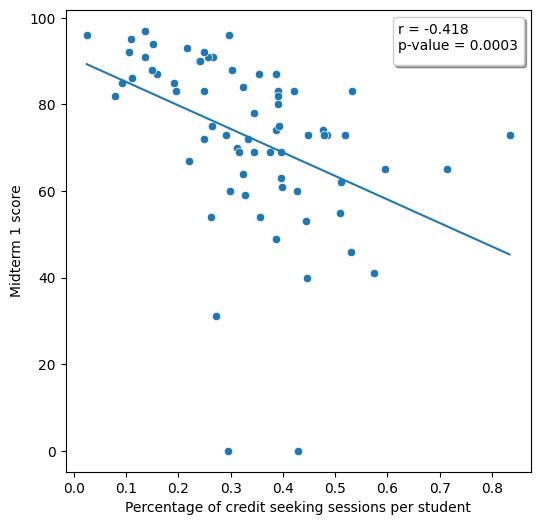

In [350]:
Y = "Midterm 1" 
X = "% of CrSk Sessions"
res = stats.linregress(Clustered_Users[X], Clustered_Users[Y])
rvalue, pvalue = stats.pearsonr(x=Clustered_Users[X], y=Clustered_Users[Y])
print(f"R: {res.rvalue}")
print("P-value", pvalue)
fig, axs = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=Clustered_Users, x=X, y=Y)
gfg = sns.lineplot(x=Clustered_Users[X], y=res.intercept + res.slope * Clustered_Users[X])

gfg.set(
    xlabel= "Percentage of credit seeking sessions per student",
    ylabel="Midterm 1 score",
)
plt.legend(loc='upper right',  frameon=True,  shadow=True, title='r = -0.418\np-value = 0.0003')

plt.show()

fig.savefig("Midterm-1-r-22.pdf", facecolor="white",dpi=500)

R: -0.3737609471148063
P-value 0.0015590050416602777


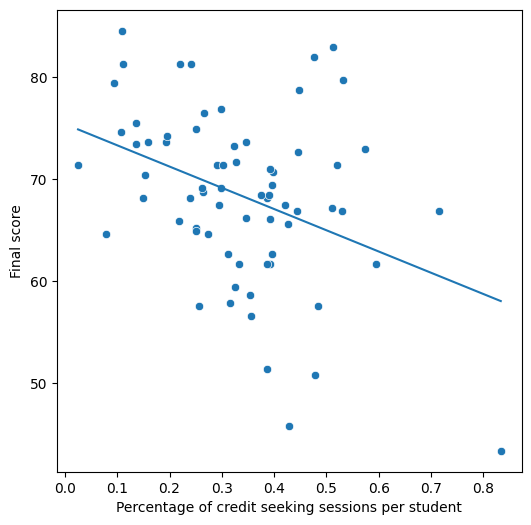

In [341]:
Y = "Final Score" 
X = "% of CrSk Sessions"
res = stats.linregress(Clustered_Users[X], Clustered_Users[Y])
rvalue, pvalue = stats.pearsonr(x=Clustered_Users[X], y=Clustered_Users[Y])
print(f"R: {res.rvalue}")
print("P-value", pvalue)
fig, axs = plt.subplots(figsize=(6, 6))

sns.scatterplot(data=Clustered_Users, x=X, y=Y)
gfg = sns.lineplot(x=Clustered_Users[X], y=res.intercept + res.slope * Clustered_Users[X])

gfg.set(
    xlabel="Percentage of credit seeking sessions per student",
    ylabel="Final score",
)
plt.show()
fig.savefig("Final-Score-r-22.pdf", facecolor="white",dpi=500)


In [266]:
print(
    "% of CrSk Framesets vs. Total Homeworks: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Total Homeworks"]),
)
print(
    "% of CrSk Framesets vs. Final Exam: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Final Exam"]),
)
print(
    "% of CrSk Framesets vs. Total Exams: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Total Exams"]),
)
print(
    "% of CrSk Framesets vs. Final Score: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Final Score"]),
)

print(
    "% of CrSk Framesets vs. Midterm 1: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Framesets"], y=Clustered_Users["Midterm 1"]),
)

% of CrSk Framesets vs. Total Homeworks:  (-0.25462022894673836, 0.003336958767934233)
% of CrSk Framesets vs. Final Exam:  (-0.3073907991782101, 0.00035507795014683434)
% of CrSk Framesets vs. Total Exams:  (-0.2796602515187236, 0.0012165103853829674)
% of CrSk Framesets vs. Final Score:  (-0.2442464325274142, 0.004931923224349785)
% of CrSk Framesets vs. Midterm 1:  (-0.19909460811100618, 0.022621005506149414)


In [267]:
print(
    "% of Credit Seeking Vs. Total Homeworks: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Sessions"], y=Clustered_Users["Total Homeworks"]),
)
print(
    "% of Credit Seeking Vs. Final Exam: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Sessions"], y=Clustered_Users["Final Exam"]),
)
print(
    "% of Credit Seeking Vs. Total Exams: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Sessions"], y=Clustered_Users["Total Exams"]),
)
print(
    "% of Credit Seeking Vs. Final Score: ",
    stats.pearsonr(x=Clustered_Users["% of CrSk Sessions"], y=Clustered_Users["Final Score"]),
)

% of Credit Seeking Vs. Total Homeworks:  (-0.265600699630478, 0.002168933120331135)
% of Credit Seeking Vs. Final Exam:  (-0.321310166141356, 0.0001825295226554095)
% of Credit Seeking Vs. Total Exams:  (-0.29429801349587814, 0.0006448860566981726)
% of Credit Seeking Vs. Final Score:  (-0.26026804077962834, 0.002679719373717125)


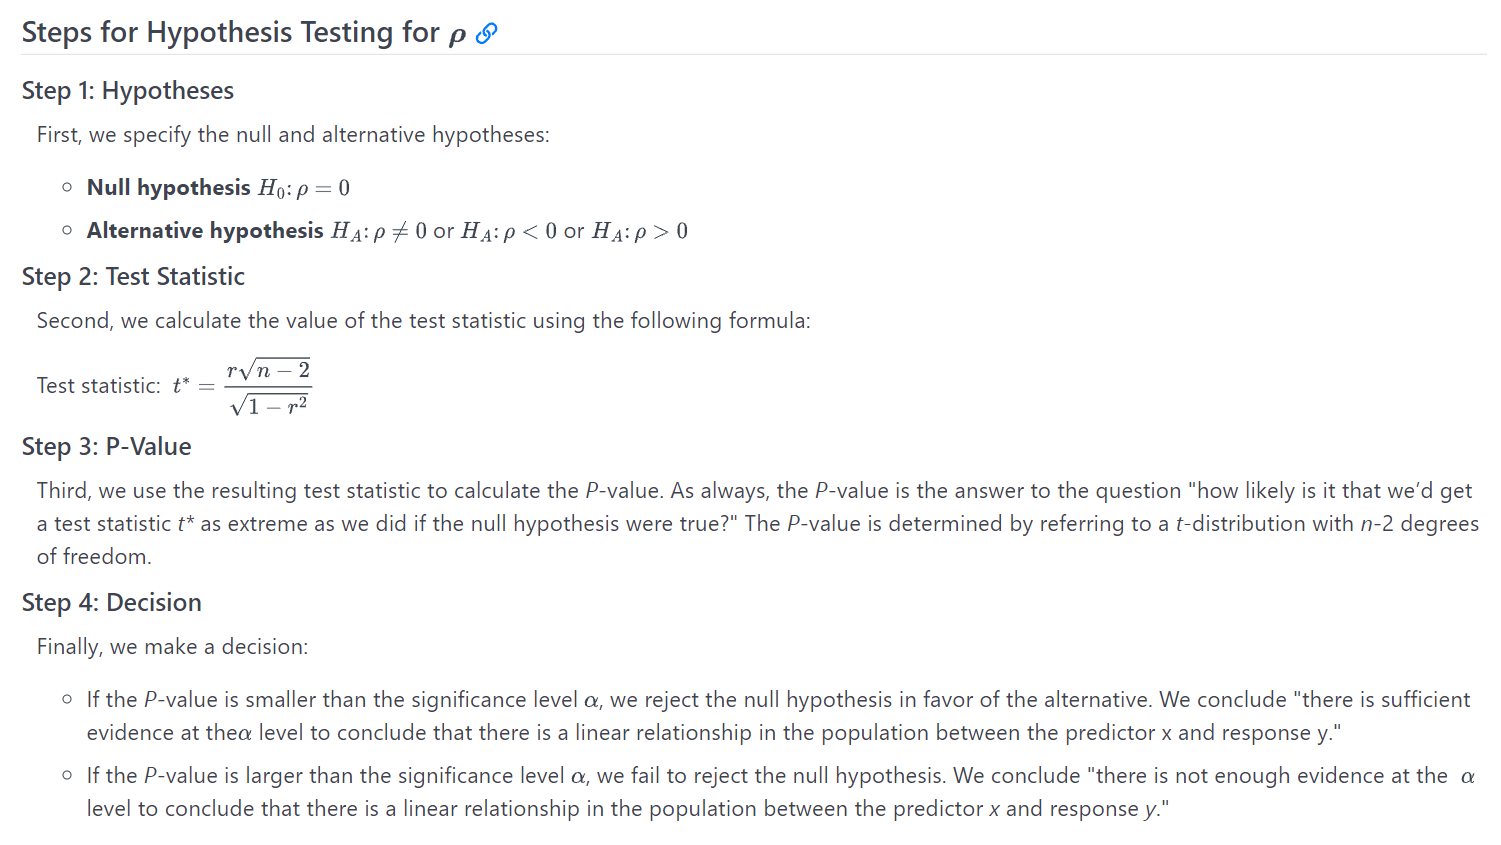

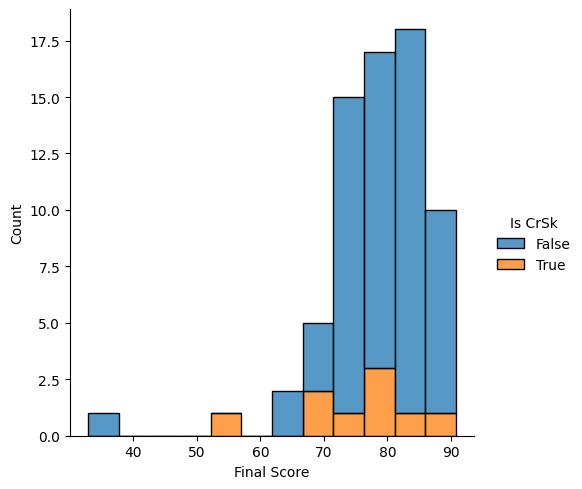

In [317]:
sns.displot(data=Clustered_Users, x="Final Score", hue="Is CrSk", multiple="stack")

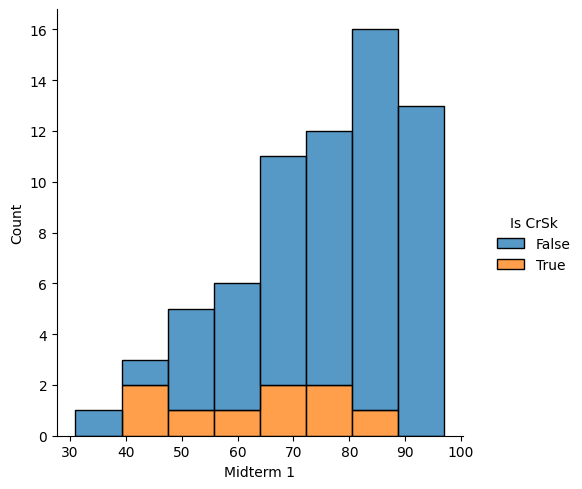

In [318]:
sns.displot(data=Clustered_Users, x="Midterm 1", hue="Is CrSk", multiple="stack")

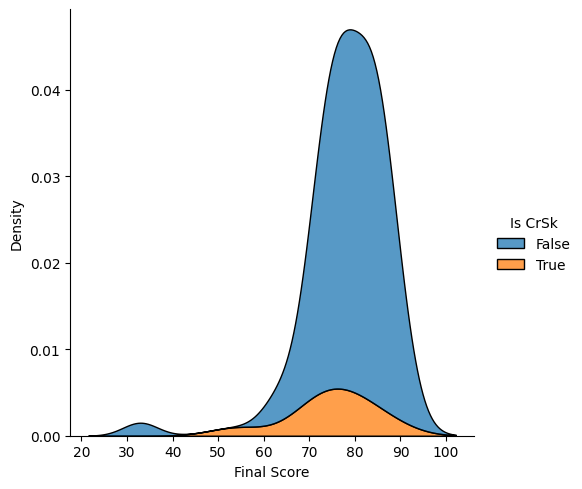

In [321]:
sns.displot(
    data=Clustered_Users, x="Final Score", hue="Is CrSk", multiple="stack", kind="kde", legend=True,
)
 
fig.savefig("Final-Score-22-KDE.pdf", facecolor="white",dpi=500)


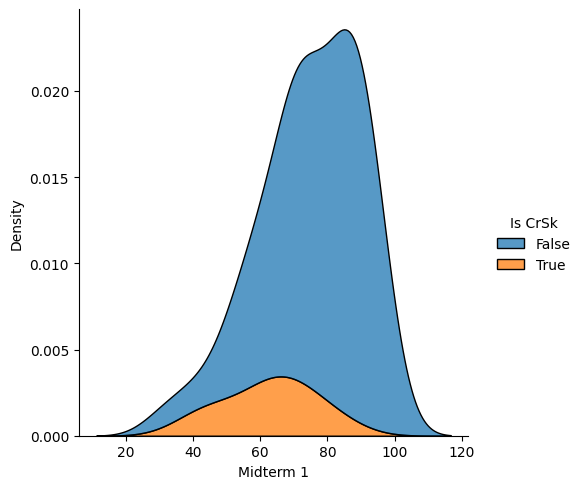

In [320]:
sns.displot(
    data=Clustered_Users, x="Midterm 1", hue="Is CrSk", multiple="stack", kind="kde"
)

# t-test for comparing Scores between Students

In [342]:
temp = Clustered_Users[Clustered_Users["Is CrSk"] == True]["Final Score"]
print("Credit Seeking: ", temp.mean(), temp.std(), len(temp), temp.median())

print()
temp = Clustered_Users[Clustered_Users["Is CrSk"] == False]["Final Score"]
print("Normal: ", temp.mean(), temp.std(), len(temp), temp.median())

Credit Seeking:  68.13111111111112 11.428054782468934 9 67.2

Normal:  68.49399999999999 7.9522477794497 60 68.65


In [326]:
temp = Clustered_Users[Clustered_Users["Is CrSk"] == True]["Midterm 1"]
print("Credit Seeking: ", temp.mean(), temp.std(), len(temp), temp.median())

print()
temp = Clustered_Users[Clustered_Users["Is CrSk"] == False]["Midterm 1"]
print("Normal: ", temp.mean(), temp.std(), len(temp), temp.median())

Credit Seeking:  62.55555555555556 13.436062584618226 9 65.0

Normal:  76.44827586206897 14.704304673209304 60 79.0
